# Integrating Large Language Models with Raku

### Anton Antonov   
### ***TRC-2023***   
### October 2023   

-----

## Abstract

***[TRC-2023 talk link](https://conf.raku.org/talk/194)***

In this presentation we discuss different ways of using Large Language Models (LLMs) in Raku.

We consider using LLMs via:
- [Jupyter Chatbooks](https://raku.land/zef:antononcube/Jupyter::Chatbook)
- [Literate programming](https://raku.land/zef:antononcube/Text::CodeProcessing)
- [LLM functions](https://raku.land/zef:antononcube/LLM::Functions)
- [LLM chat objects](https://raku.land/zef:antononcube/LLM::Functions)
- [LLM prompts](https://raku.land/zef:antononcube/LLM::Prompts)

The presentation has multiple demos and examples of LLM utilization that include:
- [Data retrieval, reshaping, and visualization](https://rakuforprediction.wordpress.com/2023/08/01/workflows-with-llm-functions/)
- Computation workflows in Physics and Chemistry
- [Test generation and narration](https://github.com/antononcube/Raku-LLM-Functions/blob/main/docs/Expand-tests-into-doc-examples_woven.md)
- Iterative grammar development
- [Number guessing games staging (man vs machine and machine vs machine)](https://rakuforprediction.wordpress.com/2023/08/06/number-guessing-games-palm-vs-chatgpt/)
- ["In place" document generation](https://github.com/antononcube/RakuForPrediction-book/blob/main/Articles/LLM-generated/12-steps-guide-to-quit-Python-via-OpenAI-PaLM-2.md)
- Code writing assistance
- [Comparison with Python- and Mathematica LLM implementations](https://community.wolfram.com/groups/-/m/t/3053519)
- *Others*

-----

## Jupyter Chatbooks

### Chat cells


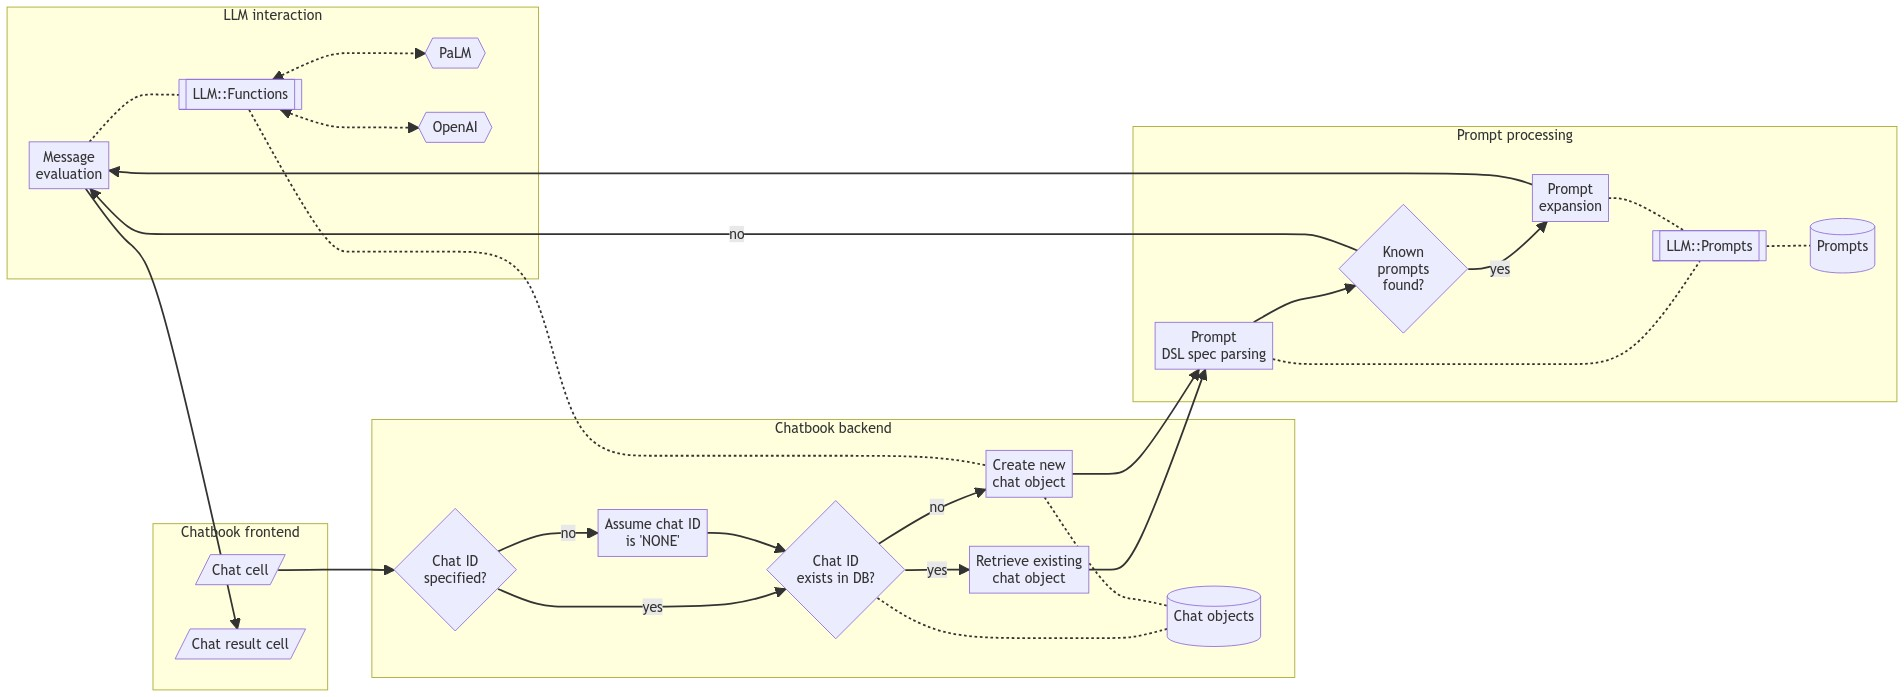

In [1]:
#% mermaid
flowchart LR
    OpenAI{{OpenAI}}
    PaLM{{PaLM}}
    LLMFunc[[LLM::Functions]]
    LLMProm[[LLM::Prompts]]
    CODB[(Chat objects)]
    PDB[(Prompts)]
    CCell[/Chat cell/]
    CRCell[/Chat result cell/]
    CIDQ{Chat ID<br/>specified?}
    CIDEQ{Chat ID<br/>exists in DB?}
    RECO[Retrieve existing<br/>chat object]
    COEval[Message<br/>evaluation]
    PromParse[Prompt<br/>DSL spec parsing]
    KPFQ{Known<br/>prompts<br/>found?}
    PromExp[Prompt<br/>expansion]
    CNCO[Create new<br/>chat object]
    CIDNone["Assume chat ID<br/>is 'NONE'"] 
    subgraph Chatbook frontend    
        CCell
        CRCell
    end
    subgraph Chatbook backend
        CIDQ
        CIDEQ
        CIDNone
        RECO
        CNCO
        CODB
    end
    subgraph Prompt processing
        PDB
        LLMProm
        PromParse
        KPFQ
        PromExp 
    end
    subgraph LLM interaction
      COEval
      LLMFunc
      PaLM
      OpenAI
    end
    CCell --> CIDQ
    CIDQ --> |yes| CIDEQ
    CIDEQ --> |yes| RECO
    RECO --> PromParse
    COEval --> CRCell
    CIDEQ -.- CODB
    CIDEQ --> |no| CNCO
    LLMFunc -.- CNCO -.- CODB
    CNCO --> PromParse --> KPFQ
    KPFQ --> |yes| PromExp
    KPFQ --> |no| COEval
    PromParse -.- LLMProm 
    PromExp -.- LLMProm
    PromExp --> COEval 
    LLMProm -.- PDB
    CIDQ --> |no| CIDNone
    CIDNone --> CIDEQ
    COEval -.- LLMFunc
    LLMFunc <-.-> OpenAI
    LLMFunc <-.-> PaLM

### Chat meta cells

In [8]:
#% mermaid

flowchart LR
    LLMFunc[[LLM::Functions]]
    CODB[(Chat objects)]
    CCell[/Chat meta cell/]
    CRCell[/Chat meta cell result/]
    CIDQ{Chat ID<br/>specified?}
    KCOMQ{Known<br/>chat object<br/>method?}
    AKWQ{Keyword 'all'<br/>specified?} 
    KCODBMQ{Known<br/>chat objects<br/>DB method?}
    CIDEQ{Chat ID<br/>exists in DB?}
    RECO[Retrieve existing<br/>chat object]
    COEval[Chat object<br/>method<br/>invocation]
    CODBEval[Chat objects DB<br/>method<br/>invocation]
    CNCO[Create new<br/>chat object]
    CIDNone["Assume chat ID<br/>is 'NONE'"] 
    NoCOM[/Cannot find<br/>chat object<br/>message/]
    CntCmd[/Cannot interpret<br/>command<br/>message/]
    subgraph Chatbook
        CCell
        NoCOM
        CntCmd
        CRCell
    end
    CCell --> CIDQ
    CIDQ --> |yes| CIDEQ  
    CIDEQ --> |yes| RECO
    RECO --> KCOMQ
    KCOMQ --> |yes| COEval --> CRCell
    KCOMQ --> |no| CntCmd
    CIDEQ -.- CODB
    CIDEQ --> |no| NoCOM
    LLMFunc -.- CNCO -.- CODB
    CNCO --> COEval
    CIDQ --> |no| AKWQ
    AKWQ --> |yes| KCODBMQ
    KCODBMQ --> |yes| CODBEval
    KCODBMQ --> |no| CntCmd
    CODBEval -.- CODB
    CODBEval --> CRCell
    AKWQ --> |no| CIDNone
    CIDNone --> CIDEQ
    COEval -.- LLMFunc

[![](https://mermaid.ink/img/pako:eNqFVMGOmzAQ_RXLl7TSZnNH1VYboFKULFHooQfIwYEhuAU7sk3SKMm_1xgChk1UTrbnzfMbzxsuOOEpYAdnBT8lOREKrcKYIf2tVh8_KpZEkV44Tr1UlDO53TZhd-3Noy9uThTiu9-QKPn1HnGhKKKZCZWgCEr0fnYPho-iSICsCtWBFt7mYhAL79tOzN7kARKaUUi_3xrE0l1_bC5Lxk_MAJJeh9lr5px36PflLw2G84mLFE1IUUzGrKij9ebPiKU58OZoSK7F-kO18JdKJRFlyJvfUaHvrqMQlKBwBGQQlO3HV3Rv6x9JEbkPizJLyo48IXVDrHaMk6S-__-JgRbmCiAKEIPTM0ULL-AMohi_S1mVgBKrXirRJFgH_iTG2_YhA64bpLtMGOMKZZSlT9okJdlD13em3DLt0ihTIA4CGmzCy5K0PKM8We32ghxyVBe_4_xPc9yZsd8aXVbUXGjtwx4OLLX8jKbTN-PL3qHm6HoGeW08gJBlCCtYt743gQkY-1pOtqlM75vrLDUWjPHrQHh73-vUmOCThhpuld2OdYMPaj3DxKCV2OgYV1uT1dPUz5UlvZ2ewSgNKmss-iD-qaQWOhbXHY9epxdimBqzDpx775-_sUfM8Lcvgl9wCaIkNNW_w0uNirHKoYQYO3qZQkb0LyrGMbtpKKkU_3nWWY4SFbzg6pDqCfIo0UYssZORQsLtH3MVo8s?type=png)](https://mermaid.live/edit#pako:eNqFVMGOmzAQ_RXLl7TSZnNH1VYboFKULFHooQfIwYEhuAU7sk3SKMm_1xgChk1UTrbnzfMbzxsuOOEpYAdnBT8lOREKrcKYIf2tVh8_KpZEkV44Tr1UlDO53TZhd-3Noy9uThTiu9-QKPn1HnGhKKKZCZWgCEr0fnYPho-iSICsCtWBFt7mYhAL79tOzN7kARKaUUi_3xrE0l1_bC5Lxk_MAJJeh9lr5px36PflLw2G84mLFE1IUUzGrKij9ebPiKU58OZoSK7F-kO18JdKJRFlyJvfUaHvrqMQlKBwBGQQlO3HV3Rv6x9JEbkPizJLyo48IXVDrHaMk6S-__-JgRbmCiAKEIPTM0ULL-AMohi_S1mVgBKrXirRJFgH_iTG2_YhA64bpLtMGOMKZZSlT9okJdlD13em3DLt0ihTIA4CGmzCy5K0PKM8We32ghxyVBe_4_xPc9yZsd8aXVbUXGjtwx4OLLX8jKbTN-PL3qHm6HoGeW08gJBlCCtYt743gQkY-1pOtqlM75vrLDUWjPHrQHh73-vUmOCThhpuld2OdYMPaj3DxKCV2OgYV1uT1dPUz5UlvZ2ewSgNKmss-iD-qaQWOhbXHY9epxdimBqzDpx775-_sUfM8Lcvgl9wCaIkNNW_w0uNirHKoYQYO3qZQkb0LyrGMbtpKKkU_3nWWY4SFbzg6pDqCfIo0UYssZORQsLtH3MVo8s)

## Generating documents via templates and LLMs


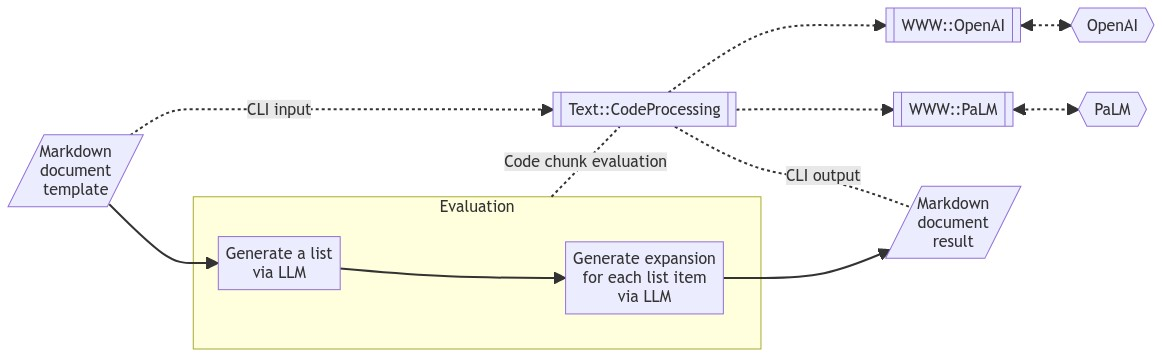

In [2]:
#% mermaid

graph LR
   OpenAI{{OpenAI}}
   PaLM{{PaLM}}
   TCP[[Text::CodeProcessing]]
   WWWOpenAI[[WWW::OpenAI]] 
   WWWPaLM[[WWW::PaLM]]
   MDT[/Markdown<br>document<br>template/]
   MDR[/Markdown<br>document<br>result/]
   Gen12[Generate a list<br>via LLM]
   GenExps[Generate expansion<br>for each list item<br>via LLM]
   TCP -.-> WWWOpenAI <-.-> OpenAI
   TCP -.-> WWWPaLM <-.-> PaLM
   MDT --> Gen12 --> GenExps --> MDR
   MDT -.-> |CLI input|TCP
   TCP -.- |CLI output|MDR
   subgraph Evaluation
     Gen12
     GenExps
   end
   Evaluation -.- |Code chunk evaluation|TCP

----

## LLM utilization flowchart 


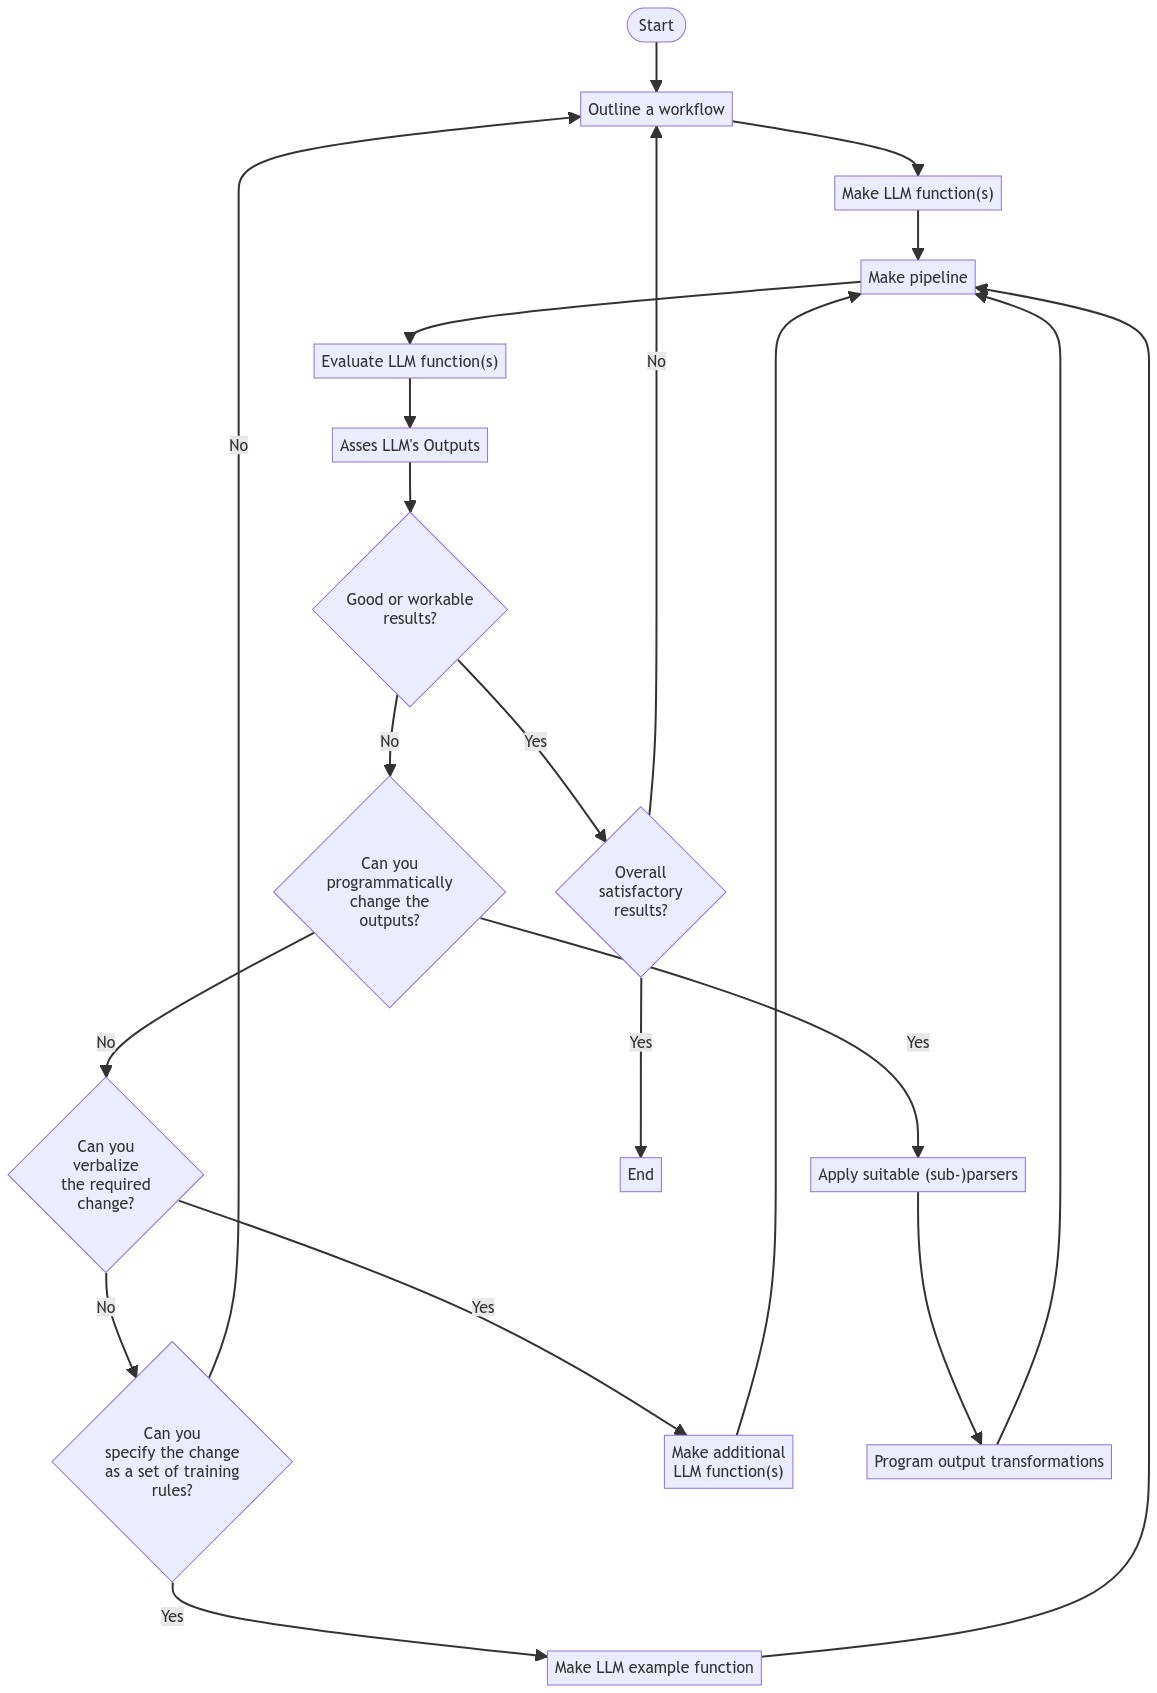

In [5]:
#% mermaid

flowchart TD
    A([Start]) --> HumanWorkflow[Outline a workflow] --> LLMFunc["Make LLM function(s)"]
    LLMFunc --> MakePipeline[Make pipeline]
    MakePipeline --> LLMEval["Evaluate LLM function(s)"]
    LLMEval --> HumanAsses[Asses LLM's Outputs]
    HumanAsses --> GoodLLM{Good or workable<br>results?}
    GoodLLM --> |No| CanProgram{Can you<br>programmatically<br>change the<br>outputs?}
    CanProgram --> |No| KnowVerb{Can you<br>verbalize<br>the required<br>change?}
    KnowVerb --> |No| KnowRule{Can you<br>specify the change<br>as a set of training<br>rules?}
    KnowVerb --> |Yes| AddLLM["Make additional<br>LLM function(s)"]
    AddLLM --> MakePipeline
    CanProgram --> |Yes| ApplySubParser["Apply suitable (sub-)parsers"]
    ApplySubParser --> HumanMassageOutput[Program output transformations]
    HumanMassageOutput --> MakePipeline
    GoodLLM --> |Yes| OverallGood{Overall<br>satisfactory<br>results?}
    OverallGood --> |No| HumanWorkflow
    OverallGood --> |Yes| End
    KnowRule --> |Yes| LLMExamFunc[Make LLM example function]
    KnowRule --> |No| HumanWorkflow
    LLMExamFunc --> MakePipeline


------

## References 

### Articles

[AA1] Anton Antonov,
["Literate programming via CLI"](https://rakuforprediction.wordpress.com/2023/03/06/literate-programming-via-cli/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov,
["Generating documents via templates and LLMs"](https://rakuforprediction.wordpress.com/2023/07/11/generating-documents-via-templates-and-llms/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA3] Anton Antonov,
["Workflows with LLM functions"](https://rakuforprediction.wordpress.com/2023/08/01/workflows-with-llm-functions/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA4] Anton Antonov,
["Number guessing games: PaLM vs ChatGPT"](https://rakuforprediction.wordpress.com/2023/08/06/number-guessing-games-palm-vs-chatgpt/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).


### Packages

[AAp1] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[WWW::PaLM Raku package](https://github.com/antononcube/Raku-WWW-PaLM),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[Text::SubParsers Raku package](https://github.com/antononcube/Raku-Text-SubParsers),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[Text::CodeProcessing Raku package](https://github.com/antononcube/Raku-Text-CodeProcessing),
(2021),
[GitHub/antononcube](https://github.com/antononcube).

### Videos

[AAv1] Anton Antonov,
["Racoons playing with pearls and onions"](https://www.youtube.com/watch?v=zlkoNZK8MpU)
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4prediction).

[AAv2] Anton Antonov,
["Streamlining ChatGPT code generation and narration workflows (Raku)"](https://www.youtube.com/watch?v=mI-oWLz5dYY)
(2023),
[YouTube/@AAA4Prediction](https://www.youtube.com/@AAA4prediction).
